### prepDataForCollegeMap
documentation: https://educationdata.urban.org/documentation/colleges.html#nhgis-geographic-variables-2010-census-geographies

In [ ]:
import pandas as pd
import numpy as np
import geopandas as gpd
from shapely.geometry import Point

import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
geo = pd.read_csv('data/stag_college_geo.csv')
dire = pd.read_csv('data/stag_college_info.csv',low_memory=False)
adm = pd.read_csv('data/stag_college_admissions.csv')
req = pd.read_csv('data/stag_college_admissions_req.csv')
comp = pd.read_csv('data/stag_college_completers.csv')
aid = pd.read_csv('data/stag_college_student_info.csv')

### check geo df

In [ ]:
geo.columns

In [ ]:
geo.drop(columns=['census_region', 'census_division', 'class_code', 'fips', 'state_fips_geo', 'year',
                  'county_fips', 'geocode_accuracy', 'geocode_accuracy_detailed','county_fips_geo', 'tract',
                  'block_group', 'puma', 'geoid_block','msa_cmsa', 'place_fips', 'geoid_place', 'place_name',
                  'upper_chamber','state_leg_district_upper', 'upper_chamber_name', 'lower_chamber',
                  'state_leg_district_lower', 'lower_chamber_name'], inplace=True)

In [ ]:
geo.head()

In [ ]:
len(geo)

In [ ]:
len(geo.unitid.unique())

### college info

In [ ]:
dire.columns

In [ ]:
dire.drop(columns=['fips', 'inst_name', 'address', 'state_abbr', 'zip',
                   'phone_number', 'city', 'county_name', 
                   'region', 'inst_control', 'institution_level', 
                   'chief_admin_name', 'chief_admin_title', 
                   'primarily_postsecondary', 'hospital', 'medical_degree',
                   'tribal_college', 'ein','offering_highest_level',
                   'offering_highest_degree', 'currently_active_ipeds', 'date_closed',
                   'duns', 'title_iv_indicator', 'offering_undergrad', 'offering_grad',
                   'newid', 'year_deleted', 'url_school', 'degree_granting', 'open_public',
                   'postsec_public_active', 'postsec_public_active_title_iv',
                   'inst_system_flag', 'inst_system_name', 'reporting_method',
                   'inst_category','inst_alias', 'url_fin_aid',
                   'cbsa', 'cbsa_type', 'csa', 'necta',
                   'comparison_group', 'longitude', 'latitude', 'county_fips',
                   'congress_district_id', 'cc_basic_2010', 'cc_instruc_undergrad_2010',
                   'cc_instruc_grad_2010', 'cc_undergrad_2010', 'cc_enroll_2010',
                   'cc_size_setting_2010', 'cc_basic_2000', 'url_netprice',
                   'comparison_group_custom', 'url_veterans', 'url_athletes',
                   'cc_basic_2015', 'cc_instruc_undergrad_2015', 'cc_instruc_grad_2015',
                   'cc_undergrad_2015', 'cc_enroll_2015', 'cc_size_setting_2015',
                   'url_disability_services', 'inst_status'], inplace=True)

In [ ]:
dcols = ['sector', 'hbcu', 'urban_centric_locale', 'land_grant', 'inst_size', 'url_application']

In [ ]:
dire[dcols] = dire[dcols].replace({-1:np.nan, -2:np.nan, -3:np.nan})

In [ ]:
dire['sector'] = dire['sector'].replace({0:"Administrative unit",
                                         1:"Public, four-year or above",
                                         2:"Private not-for-profit, four-year or above",
                                         3:"Private for-profit, four-year or above", 
                                         4:"Public, two-year", 
                                         5:"Private not-for-profit, two-year", 
                                         6:"Private for-profit, two-year", 
                                         7:"Public, less-than two-year", 
                                         8:"Private not-for-profit, less-than-two-year", 
                                         9:"Private for-profit, less-than-two-year", 
                                        np.nan:"Unreported"})

In [ ]:
dire['hbcu'] = dire['hbcu'].replace({0:"No", 1:"Yes"})

In [ ]:
dire['urban_centric_locale']=dire['urban_centric_locale'].replace({1:"Large city", 
                                                                  2:"Midsize city", 
                                                                  3:"Urban fringe of large city", 
                                                                  4:"Urban fringe of midsize city", 
                                                                  5:"Large town", 
                                                                  6:"Small town", 
                                                                  7:"Rural", 
                                                                  8:"Rural", 
                                                                  9:"Not assigned", 
                                                                  11:"Large city", 
                                                                  12:"Midsize city",
                                                                  13:"Small city",
                                                                  21:"Suburb",
                                                                  22:"Suburb",
                                                                  23:"Suburb",
                                                                  31:"Town",
                                                                  32:"Town", 
                                                                  33:"Town",
                                                                  41:"Rural",
                                                                  42:"Rural",
                                                                  43:"Rural"})

In [ ]:
dire['land_grant'] = dire['land_grant'].replace({0:"No", 1:"Yes"})

In [ ]:
dire['inst_size'] = dire['inst_size'].replace({1:"Under 1,000", 2:"1,000–4,999", 3:"5,000–9,999", 
                                               4:"10,000–19,999", 5:"20,000 and above"})

In [ ]:
geo = dire.merge(geo, on=['unitid','opeid'])
geo.to_csv('data/clean_college_geo.csv', index=False)

In [ ]:
geo.year.unique()

### check admissions df

In [ ]:
adm.columns

In [ ]:
adm.drop(columns=['fips'], inplace=True)

In [ ]:
adm.dtypes

cleaning the admissions df:

recode the values into NaNs

- 1—Missing/not reported
- 2—Not applicable
- 3—Suppressed data

In [ ]:
cols = ['sex', 'number_applied', 'number_admitted',
        'number_enrolled_ft', 'number_enrolled_pt', 'number_enrolled_total']
adm[cols] = adm[cols].replace({-1:np.nan, -2:np.nan, -3:np.nan})

In [ ]:
adm['sex'].unique()

In [ ]:
# recode gender
adm['gender'] = "Total"
adm.loc[adm['sex']==1, 'gender'] = "Male"
adm.loc[adm['sex']==2, 'gender'] = "Female"

In [ ]:
adm.year.unique()

In [ ]:
adm['pct_admitted'] = adm['number_admitted']/adm['number_applied']
adm['pct_matriculated'] = adm['number_enrolled_total']/adm['number_admitted']

In [ ]:
adm.head()

In [ ]:
adm.to_csv('data/clean_college_admissions.csv', index=False)

### check requirements for admissions

In [ ]:
req.columns

In [ ]:
req.drop(columns=['fips', 'reqt_hs_diploma', 'reqt_hs_rank','reqt_sat_scores', 'reqt_other_test',
                  'reqt_residence', 'reqt_ability_to_benefit', 'reqt_age', 'reqt_toefl','reqt_other',
                  'years_college_reqd', 'no_entering_freshmen', 'reqt_hs_record','reqt_college_prep', 
                  'reqt_competencies', 'sat_act_report_period'], inplace=True)

In [ ]:
rcols = ['reqt_test_scores', 'open_admissions_policy',
       'reqt_hs_gpa', 'reqt_recommendations', 'sat_number_submitting',
       'sat_percent_submitting', 'act_number_submitting',
       'act_percent_submitting', 'sat_crit_read_25_pctl',
       'sat_crit_read_75_pctl', 'sat_math_25_pctl', 'sat_math_75_pctl',
       'act_composite_25_pctl', 'act_composite_75_pctl', 'act_english_25_pctl',
       'act_english_75_pctl', 'act_math_25_pctl', 'act_math_75_pctl',
       'sat_writing_25_pctl', 'sat_writing_75_pctl', 'act_writing_25_pctl',
       'act_writing_75_pctl']
req[rcols] = req[rcols].replace({-1:np.nan, -2:np.nan, -3:np.nan})

In [ ]:
req.reqt_test_scores.unique()

In [ ]:
req['reqt_test_scores'] = req['reqt_test_scores'].replace({0:"Neither required nor recommended",1:"Required",
                                                           2:"Recommended", 3:"Considered", np.nan:"Unreported"})

In [ ]:
req.open_admissions_policy.unique()

In [ ]:
req['open_admissions_policy'] = req['open_admissions_policy'].replace({0:"No",1:"Yes",
                                                                       np.nan:"Unreported"})

In [ ]:
req.reqt_hs_gpa.unique()

In [ ]:
req['reqt_hs_gpa'] = req['reqt_hs_gpa'].replace({0:"Neither required nor recommended",1:"Required",
                                                 2:"Recommended", 3:"Considered", np.nan:"Unreported"})

In [ ]:
req.reqt_recommendations.unique()

In [ ]:
req['reqt_recommendations'] = req['reqt_recommendations'].replace({0:"Neither required nor recommended",1:"Required",
                                                                   2:"Recommended", 3:"Considered", np.nan:"Unreported"})

In [ ]:
req.describe()

In [ ]:
req.head()

In [ ]:
req.year.unique()

In [ ]:
len(req)/3

In [ ]:
req.to_csv('data/clean_college_admissions_req.csv', index=False)

### check completers df

In [ ]:
comp.columns

In [ ]:
ccols = ['cohort_year', 'institution_level',
       'subcohort', 'race', 'sex', 'cohort_rev', 'exclusions',
       'cohort_adj_150pct', 'completers_150pct', 'transfers_out',
       'still_enrolled_long_program', 'completers_100pct', 'still_enrolled',
       'no_longer_enrolled', 'completion_rate_150pct']
comp[ccols] = comp[ccols].replace({-1:np.nan, -2:np.nan, -3:np.nan})

In [ ]:
comp.institution_level.unique()

In [ ]:
comp['institution_level'] = comp['institution_level'].replace({1:"Less than two years (below associate's)",
                                                               2:"At least two but less than four years",
                                                               4:"Four or more years"})

In [ ]:
comp.subcohort.unique()

In [ ]:
comp['subcohort'] = comp['subcohort'].replace({1:"Degree/certificate nonbachelor's seeking subcohort of four-year institutions",
                                               2:"Bachelor's or equivalent subcohort of four-year institutions",
                                               99:"Total"})

In [ ]:
comp.race.unique()

In [ ]:
comp['race'] = comp['race'].replace({1:"White",2:"Black",3:"Hispanic", 4:"Asian", 5:"American Indian or Alaska Native",
                                     6:"Native Hawaiian or other Pacific Islander", 7:"Two or more races",
                                     8:"Nonresident alien", 9:"Unknown", 20:"Other", 99:"Total"})

In [ ]:
comp.sex.unique()

In [ ]:
comp['gender'] = comp['sex'].replace({1:"Male",2:"Female",99:"Total"})

In [ ]:
comp.head()

In [ ]:
comp.cohort_year.unique()

In [ ]:
len(comp)

In [ ]:
comp.year.unique()

In [ ]:
comp.to_csv('data/clean_college_completers.csv', index=False)

### check aid df

In [ ]:
aid.columns

In [ ]:
aid.drop(columns=['independent_pct', 'dependent_lowincome_pct', 'independent_lowincome_pct', 'midincome1_pct', 'midincome2_pct',
                  'highincome1_pct', 'highincome2_pct', 'dependent_midincome1_pct','dependent_midincome2_pct',
                  'dependent_highincome1_pct','dependent_highincome2_pct', 'independent_midincome1_pct','fips', 
                  'independent_midincome2_pct', 'independent_highincome1_pct','independent_highincome2_pct',
                  'parents_highest_ed_middle_school', 'parents_highest_ed_high_school', 'parents_highest_ed_postsecondary', 
                  'dependent_income_mean', 'independent_income_mean','faminc_independents_mean', 'count_family_income',
                  'count_family_income_dependent', 'count_family_income_independent', 'count_valid_dep_status',
                  'count_parent_ed', 'age_24orolder_pct','female_pct', 'married_pct', 'dependent_pct', 'veteran_pct',
                  'midincome_pct', 'highincome_pct','dependent_midincome_pct', 'dependent_highincome_pct',
                  'independent_midincome_pct', 'independent_highincome_pct'], inplace=True)

In [ ]:
acols = ['lowincome_pct','fafsa_sent_2ormore_pct', 'fafsa_sent_3ormore_pct',
       'fafsa_sent_4ormore_pct', 'fafsa_sent_5ormore_pct',
       'count_total_fafsa_applicants', 'first_gen_student_pct', 'faminc_mean','faminc_med']

In [ ]:
aid[acols] = aid[acols].replace({-1:np.nan, -2:np.nan, -3:np.nan})

In [ ]:
aid

In [ ]:
aid.year.unique()

In [ ]:
aid.to_csv('data/clean_college_student_info.csv', index=False)

In [ ]:
df = geo.merge(adm, on=['year', 'unitid']).merge(req,
                         on=['year', 'unitid'])

In [ ]:
df['opeidi'] = pd.to_numeric(df['opeid'],errors='coerce').fillna(0).astype(int)

In [ ]:
df2 = df.merge(aid, left_on = ['year', 'unitid', 'opeidi'],
               right_on=['year', 'unitid', 'opeid'])

In [ ]:
df2.rename(columns=({'opeid_x':'opeid'}), inplace=True)
df2.drop(columns=['opeid6', 'opeid_y'], inplace=True)

In [ ]:
df3 = df2.merge(comp, left_on = ['year', 'unitid','sex', 'gender'],
                right_on=['year', 'unitid', 'sex', 'gender'], 
               how='left')

In [ ]:
df3.to_csv('data/clean_college.csv', index=False)

### Trim down to only NY Universities

In [ ]:
geo.year.value_counts()

In [ ]:
geo[geo.state_abbr=='NY'].sector.value_counts()

In [ ]:
nyColleges = geo[(geo.year==2017) & 
                 (geo.sector.isin(['Private not-for-profit, four-year or above', 'Public, four-year or above'])) &
                 (geo.state_abbr == 'NY') & (geo.inst_size != 'Under 1,000')].copy()

In [ ]:
nyColleges.reset_index(inplace=True)

In [ ]:
nyColleges.columns

In [ ]:
nyColleges.drop(columns=['year', 'sector', 'url_application', 'county_name'], inplace=True)

In [ ]:
admTotal = adm[(adm.year==2017) & (adm.gender=='Total')].copy()
admFemale = adm[(adm.year==2017) & (adm.gender=='Female')].copy()
admMale = adm[(adm.year==2017) & (adm.gender=='Male')].copy()

In [ ]:
admTotal.drop(columns=['sex', 'number_enrolled_ft', 'number_enrolled_pt', 
                       'gender', 'year'], inplace=True)
admFemale.drop(columns=['sex', 'number_enrolled_ft', 'number_enrolled_pt', 
                      'number_enrolled_total', 'gender', 'year'], inplace=True)
admMale.drop(columns=['sex', 'number_enrolled_ft', 'number_enrolled_pt', 
                      'number_enrolled_total', 'gender', 'year'], inplace=True)

In [ ]:
# rename cols
admTotal.rename(columns={"number_applied":"total_applied", 
                        "number_admitted":"total_admitted", 
                        "pct_admitted": "pct_admitted_total", 
                        "pct_matriculated": "pct_matriculated_total"}, inplace=True)

admFemale.rename(columns={"number_applied":"female_applied", 
                        "number_admitted":"female_admitted", 
                        "pct_admitted": "pct_admitted_female", 
                        "pct_matriculated": "pct_matriculated_female"}, inplace=True)

admMale.rename(columns={"number_applied":"male_applied", 
                        "number_admitted":"male_admitted", 
                        "pct_admitted": "pct_admitted_male", 
                        "pct_matriculated": "pct_matriculated_male"}, inplace=True)

In [ ]:
nyColleges = nyColleges.merge(admTotal, on='unitid').merge(admFemale, on='unitid').merge(admMale, on='unitid')

In [ ]:
nyColleges = nyColleges.merge(req[req.year==2017], on='unitid')

In [ ]:
nyColleges.columns

In [ ]:
totComp = comp[(comp.subcohort=='Total') 
               & (comp.institution_level=='Four or more years')].groupby(['unitid', 'gender','race']).mean().reset_index()

In [ ]:
totComp.drop(columns=['fips', 'cohort_year', 'sex', 'cohort_rev', 'exclusions', 'cohort_adj_150pct', 
             'transfers_out', 'still_enrolled_long_program', 'completers_100pct','completers_150pct',
              'still_enrolled', 'no_longer_enrolled', 'year'], inplace=True)

In [ ]:
tot = totComp[(totComp.gender=='Total') & (totComp.race=='Total')][['unitid', 'completion_rate_150pct']].copy()
totFemale = totComp[(totComp.gender=='Female') & (totComp.race=='Total')][['unitid', 'completion_rate_150pct']].copy()
totMale = totComp[(totComp.gender=='Male') & (totComp.race=='Total')][['unitid', 'completion_rate_150pct']].copy()

In [ ]:
totFemale.rename(columns={'completion_rate_150pct':'female_completion_rate_150pct'}, inplace=True)
totMale.rename(columns={'completion_rate_150pct':'male_completion_rate_150pct'}, inplace=True)

In [ ]:
nyColleges = nyColleges.merge(tot, on='unitid').merge(totFemale, on='unitid').merge(totMale, on='unitid')

In [ ]:
aid = aid.groupby(['unitid']).mean().reset_index().copy()

In [ ]:
nyColleges = nyColleges.merge(aid[['unitid', 'first_gen_student_pct', 'faminc_med']], on='unitid')

In [ ]:
# round all values
nyColleges['pct_admitted_total'] = round(nyColleges['pct_admitted_total']*100)
nyColleges['pct_matriculated_total'] = round(nyColleges['pct_matriculated_total']*100)
nyColleges['pct_admitted_female'] = round(nyColleges['pct_admitted_female']*100)
nyColleges['pct_matriculated_female'] =round(nyColleges['pct_matriculated_female']*100)
nyColleges['pct_admitted_male'] = round(nyColleges['pct_admitted_male']*100)
nyColleges['pct_matriculated_male'] =round(nyColleges['pct_matriculated_male']*100)

nyColleges['completion_rate_150pct'] = round(nyColleges['completion_rate_150pct']*100)
nyColleges['female_completion_rate_150pct'] = round(nyColleges['female_completion_rate_150pct']*100)
nyColleges['male_completion_rate_150pct'] = round(nyColleges['male_completion_rate_150pct']*100)

nyColleges['first_gen_student_pct'] = round(nyColleges['first_gen_student_pct']*100)
nyColleges['faminc_med'] = round(nyColleges['faminc_med'],0)

In [95]:
nyColleges.fillna('NA', inplace=True)

In [96]:
nyColleges = gpd.GeoDataFrame(nyColleges, geometry=gpd.points_from_xy(nyColleges.geo_longitude,
                                                               nyColleges.geo_latitude))


In [97]:
nyColleges.drop(columns=['geo_latitude', 'geo_longitude', 'index', 'urban_centric_locale', 'opeid',
                         'year', 'open_admissions_policy', 'sat_number_submitting','sat_percent_submitting', 
                         'act_number_submitting','act_percent_submitting', 'act_english_25_pctl',
                         'act_english_75_pctl', 'act_math_25_pctl', 'act_math_75_pctl',
                         'act_writing_25_pctl','act_writing_75_pctl'], inplace=True)


In [98]:
nyColleges.to_file("data/nyColleges.geojson", driver="GeoJSON")



In [99]:
nyColleges

,unitid,hbcu,land_grant,inst_size,inst_name,address,state_abbr,zip,total_applied,total_admitted,...,act_composite_25_pctl,act_composite_75_pctl,sat_writing_25_pctl,sat_writing_75_pctl,completion_rate_150pct,female_completion_rate_150pct,male_completion_rate_150pct,first_gen_student_pct,faminc_med,geometry
0,188340,No,No,"1,000–4,999",Vaughn College of Aeronautics and Technology,86-01 23rd Avenue,NY,11369,NA,NA,...,NA,NA,NA,NA,35.70,54.7,33.55,47.15,20445.0,POINT (-73.88360 40.76730)
1,188429,No,No,"5,000–9,999",Adelphi University,South Ave,NY,11530-0701,11851,8666,...,22,27,NA,NA,67.85,70.5,61.9,34.93,53970.0,POINT (-73.65380 40.72280)
2,188526,No,No,"1,000–4,999",Albany College of Pharmacy and Health Sciences,106 New Scotland Avenue,NY,12208-3492,1366,1073,...,23,28,NA,NA,73.80,70.15,79.35,21.94,77465.0,POINT (-73.77760 42.65250)
3,188641,No,No,"1,000–4,999",Alfred University,One Saxon Drive,NY,14802-1205,3566,2237,...,21,26,NA,NA,57.05,69.6,46.9,24.59,58244.0,POINT (-77.78960 42.25390)
4,188854,No,No,"1,000–4,999",American Musical and Dramatic Academy,211 West 61st Street,NY,10023,9153,1940,...,NA,NA,NA,NA,58.35,56.7,61.45,25.17,48898.0,POINT (-73.98780 40.77210)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,197045,No,No,"5,000–9,999",Utica College,1600 Burrstone Rd,NY,13502-4892,5656,4732,...,NA,NA,NA,NA,47.20,52.05,41.65,31.69,47574.0,POINT (-75.27240 43.09330)
110,197133,No,No,"1,000–4,999",Vassar College,124 Raymond Ave,NY,12604,7746,1842,...,30,33,NA,NA,90.90,92.55,88.8,14.64,71121.0,POINT (-73.89820 41.68650)
111,197197,No,No,"1,000–4,999",Wagner College,One Campus Rd,NY,10301-4495,2834,1975,...,NA,NA,NA,NA,68.75,74.85,59.1,28.75,77302.0,POINT (-74.09510 40.61350)
112,197708,No,No,"5,000–9,999",Yeshiva University,500 W 185th St,NY,10033-3299,1861,1169,...,23,29,NA,NA,81.70,87.35,75.65,12.49,68319.0,POINT (-73.92980 40.85070)


### descriptives of nyCollege dataset

In [96]:
nyColleges.describe()

,unitid,total_applied,total_admitted,number_enrolled_total,pct_admitted_total,pct_matriculated_total,female_applied,female_admitted,pct_admitted_female,pct_matriculated_female,...,sat_math_75_pctl,act_composite_25_pctl,act_composite_75_pctl,sat_writing_25_pctl,sat_writing_75_pctl,completion_rate_150pct,female_completion_rate_150pct,male_completion_rate_150pct,first_gen_student_pct,faminc_med
count,114.00000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,...,84.000000,75.000000,75.000000,0.0,0.0,114.000000,112.000000,113.000000,112.000000,114.000000
mean,195741.54386,10292.392523,5130.233645,1066.289720,61.605607,23.954206,5786.887850,2954.411215,62.384112,22.865421,...,624.940476,22.480000,27.293333,NaN,NaN,61.424561,64.222321,57.689381,30.044643,53149.815789
std,23844.43110,11194.099345,4575.294892,972.744513,20.326355,12.172473,6139.027764,2608.748782,20.525627,12.261761,...,72.757619,3.853254,3.344109,NaN,NaN,18.052380,17.884473,18.561940,11.277665,23468.213880
min,188340.00000,126.000000,115.000000,99.000000,6.600000,9.100000,77.000000,70.000000,6.100000,0.200000,...,450.000000,17.000000,21.000000,NaN,NaN,12.300000,14.100000,8.100000,10.800000,14737.000000
25%,190816.50000,3095.000000,1957.500000,439.500000,46.950000,17.000000,1931.000000,1266.000000,49.400000,15.800000,...,570.000000,20.000000,25.000000,NaN,NaN,49.650000,53.400000,44.000000,21.050000,34839.500000
50%,193936.50000,6207.000000,3553.000000,698.000000,63.900000,21.300000,3347.000000,2015.000000,65.100000,20.900000,...,620.000000,22.000000,27.000000,NaN,NaN,63.200000,66.600000,59.300000,29.250000,51816.000000
75%,196074.25000,12538.000000,6180.000000,1360.500000,77.050000,25.800000,7128.500000,3711.000000,77.700000,24.450000,...,660.000000,24.000000,29.000000,NaN,NaN,73.750000,77.325000,71.200000,37.050000,71372.250000
max,446604.00000,64007.000000,20966.000000,6022.000000,98.400000,86.100000,37650.000000,12771.000000,98.900000,85.700000,...,790.000000,31.000000,34.000000,NaN,NaN,94.600000,95.600000,94.200000,60.400000,115342.000000


In [97]:
nyColleges.columns

Index(['unitid', 'hbcu', 'land_grant', 'inst_size', 'inst_name', 'address',
       'state_abbr', 'zip', 'total_applied', 'total_admitted',
       'number_enrolled_total', 'pct_admitted_total', 'pct_matriculated_total',
       'female_applied', 'female_admitted', 'pct_admitted_female',
       'pct_matriculated_female', 'male_applied', 'male_admitted',
       'pct_admitted_male', 'pct_matriculated_male', 'reqt_test_scores',
       'reqt_hs_gpa', 'reqt_recommendations', 'sat_crit_read_25_pctl',
       'sat_crit_read_75_pctl', 'sat_math_25_pctl', 'sat_math_75_pctl',
       'act_composite_25_pctl', 'act_composite_75_pctl', 'sat_writing_25_pctl',
       'sat_writing_75_pctl', 'completion_rate_150pct',
       'female_completion_rate_150pct', 'male_completion_rate_150pct',
       'first_gen_student_pct', 'faminc_med', 'geometry'],
      dtype='object')

In [98]:
nyColleges.inst_size.value_counts()

1,000–4,999         65
5,000–9,999         23
10,000–19,999       18
20,000 and above     8
Name: inst_size, dtype: int64

/home/cusp/yg833/.conda/envs/yelpVE/lib/python3.7/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/cusp/yg833/.conda/envs/yelpVE/lib/python3.7/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([54., 26.,  9.,  7.,  4.,  4.,  0.,  2.,  0.,  1.]),
 array([  126. ,  6514.1, 12902.2, 19290.3, 25678.4, 32066.5, 38454.6,
        44842.7, 51230.8, 57618.9, 64007. ]),
 <a list of 10 Patch objects>)

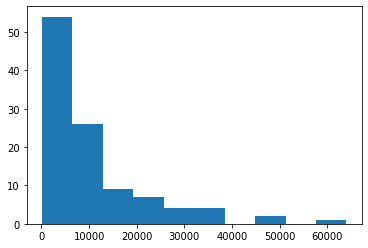

In [99]:
plt.hist(nyColleges.total_applied)

(array([51., 25., 18.,  3.,  4.,  4.,  1.,  0.,  0.,  1.]),
 array([  99. ,  691.3, 1283.6, 1875.9, 2468.2, 3060.5, 3652.8, 4245.1,
        4837.4, 5429.7, 6022. ]),
 <a list of 10 Patch objects>)

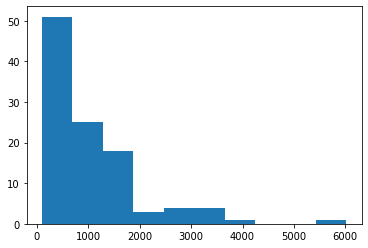

In [100]:
plt.hist(nyColleges.number_enrolled_total)

(array([ 3.,  4.,  3., 12., 10., 14., 24., 20.,  8.,  9.]),
 array([ 6.6 , 15.78, 24.96, 34.14, 43.32, 52.5 , 61.68, 70.86, 80.04,
        89.22, 98.4 ]),
 <a list of 10 Patch objects>)

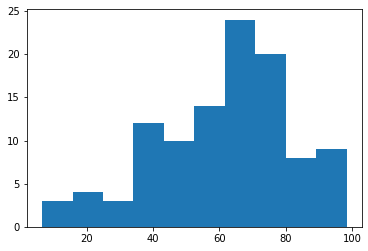

In [101]:
plt.hist(nyColleges.pct_admitted_total)

(array([ 3.,  3.,  5.,  5., 19., 15., 19., 21., 13.,  9.]),
 array([14.1 , 22.25, 30.4 , 38.55, 46.7 , 54.85, 63.  , 71.15, 79.3 ,
        87.45, 95.6 ]),
 <a list of 10 Patch objects>)

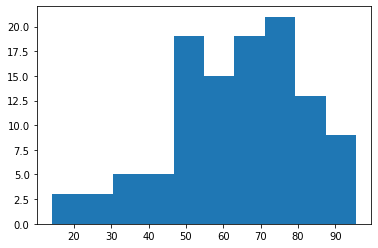

In [102]:
plt.hist(nyColleges.female_completion_rate_150pct)

(array([ 3.,  3.,  4., 14., 17., 17., 20., 17., 12.,  6.]),
 array([ 8.1 , 16.71, 25.32, 33.93, 42.54, 51.15, 59.76, 68.37, 76.98,
        85.59, 94.2 ]),
 <a list of 10 Patch objects>)

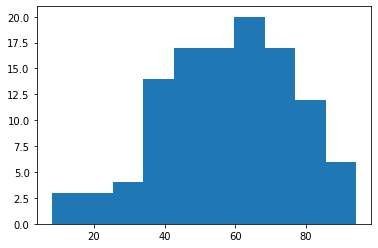

In [103]:
plt.hist(nyColleges.male_completion_rate_150pct)

(array([ 3.,  2.,  7.,  7., 18., 18., 17., 21., 14.,  7.]),
 array([12.3 , 20.53, 28.76, 36.99, 45.22, 53.45, 61.68, 69.91, 78.14,
        86.37, 94.6 ]),
 <a list of 10 Patch objects>)

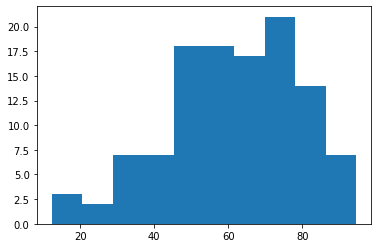

In [104]:
plt.hist(nyColleges.completion_rate_150pct)

In [105]:
nyColleges.completion_rate_150pct.describe()

count    114.000000
mean      61.424561
std       18.052380
min       12.300000
25%       49.650000
50%       63.200000
75%       73.750000
max       94.600000
Name: completion_rate_150pct, dtype: float64